In [1]:
# import all the necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

%matplotlib inline

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# read the data
bike = pd.read_csv('2017-fordgobike-tripdata.csv')

In [4]:
# take a look to the columns
bike.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [5]:
bike.shape

(519700, 15)

In [6]:
bike.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

In [7]:
bike.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [8]:
#Calculate Distance Between Coordinates.
#some parts of this code it's not my creation 
#code reference:https://stackoverflow.com/questions/33029396/using-pandas-to-calculate-distance-between-coordinates-from-imported

def dist_from_coordinates(start_station_latitude, start_station_longitude,end_station_latitude, end_station_longitude):
    R = 6371  # Earth radius in km

    #conversion to radians
    d_lat = np.radians(end_station_latitude-start_station_latitude)
    d_lon = np.radians(end_station_longitude-start_station_longitude)

    r_lat1 = np.radians(start_station_latitude)
    r_lat2 = np.radians(end_station_latitude)

    #haversine formula
    a = np.sin(d_lat/2.) **2 + np.cos(r_lat1) * np.cos(r_lat2) * np.sin(d_lon/2.)**2

    haversine = 2 * R * np.arcsin(np.sqrt(a))

    return haversine

new_column = []      #empty column for distance
for index,row in bike.iterrows():
    start_station_latitude = row['start_station_latitude'] #first row of location.latitude column here
    start_station_longitude = row['start_station_longitude'] #first row of location.longitude column here
    end_station_latitude = row['end_station_latitude'] #second row of location.latitude column here
    end_station_longitude = row['end_station_longitude'] #second row of location.longitude column here
    value = dist_from_coordinates(start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude)  #get the distance
    new_column.append(value)   #append the empty list with distance values

bike.insert(1,"Distance_KM",new_column)


In [9]:
#in case i run the calculater twice
#bike.drop(['Distance_KM','Distance_M'],axis=1,inplace=True)

In [10]:
# convert the distance from KM to M
bike['Distance_M']=bike['Distance_KM']*1000

In [11]:
# convert the duration of the trips from seconds to minutes 
bike['duration_min']=bike['duration_sec']/60

In [12]:
# calculate speed from distance and time
bike['speed_m/s']=bike['Distance_M']/bike['duration_sec']

In [13]:
# drop the rows that contain nulls
bike.dropna(inplace=True)

In [14]:
# drop the rows that contain duplicates
bike.drop_duplicates(inplace=True)

In [15]:
#convert ['end_time'] to datetime
bike.end_time = pd.to_datetime(bike.end_time)

In [16]:
#convert ['start_time'] to datetime
bike.start_time = pd.to_datetime(bike.start_time)

In [17]:
#create a column for day of the week(start)
bike['day_of_week_start'] = bike['start_time'].dt.weekday_name

In [18]:
#create a column for day of the week(end)
bike['day_of_week_end'] = bike['end_time'].dt.weekday_name

In [19]:
#convert ['member_birth_year'] to int
bike.member_birth_year = bike.member_birth_year.astype(int)

In [20]:
#convert ['duration_min'] to int
bike.duration_min = bike.duration_min.astype(int)

In [21]:
# claculate age of the members from ['member_birth_year']
bike['member_age'] = 2017 - bike['member_birth_year']

In [22]:
#sprate start time to year,month,day
bike['start_Year'] = bike['start_time'].dt.year

In [23]:
bike['start_Month'] = bike['start_time'].dt.month

In [24]:
bike['start_Day'] = bike['start_time'].dt.day

In [25]:
#sprate start time to year,month,day
bike['end_Year'] = bike['end_time'].dt.year

In [26]:
bike['end_Month'] = bike['end_time'].dt.month

In [27]:
bike['end_Day'] = bike['end_time'].dt.day

In [28]:
#creat new column for timeOfDay:morning,evening,afternoon "start"
hours = bike.start_time.dt.hour.values
bike['timeOfDay_start'] = np.where(hours <= 12, 'Morning', 
                      np.where(hours >= 17, 'Evening', 'Afternoon'))

In [29]:
#creat new column for timeOfDay:morning,evening,afternoon "end"
hours = bike.end_time.dt.hour.values
bike['timeOfDay_end'] = np.where(hours <= 12, 'Morning', 
                      np.where(hours >= 17, 'Evening', 'Afternoon'))

In [30]:
#change the order of columns
bike = bike[['duration_sec','duration_min','start_time','day_of_week_start','timeOfDay_start','start_Month','start_Day','start_Year','end_time','day_of_week_end','timeOfDay_end','end_Year','end_Month','end_Day','start_station_id','start_station_name','start_station_latitude','start_station_longitude','end_station_id','end_station_name','end_station_latitude','end_station_longitude','Distance_KM','Distance_M','bike_id','user_type','member_birth_year','member_gender','member_age','speed_m/s']]

In [31]:
bike.head(10)

,duration_sec,duration_min,start_time,day_of_week_start,timeOfDay_start,start_Month,start_Day,start_Year,end_time,day_of_week_end,...,end_station_latitude,end_station_longitude,Distance_KM,Distance_M,bike_id,user_type,member_birth_year,member_gender,member_age,speed_m/s
0,80110,1335,2017-12-31 16:57:39.654,Sunday,Afternoon,12,31,2017,2018-01-01 15:12:50.245,Monday,...,37.778768,-122.415929,0.942931,942.931149,96,Customer,1987,Male,30,0.011770
1,78800,1313,2017-12-31 15:56:34.842,Sunday,Afternoon,12,31,2017,2018-01-01 13:49:55.617,Monday,...,37.766210,-122.426614,3.069727,3069.727100,88,Customer,1965,Female,52,0.038956
4,43603,726,2017-12-31 14:23:14.001,Sunday,Afternoon,12,31,2017,2018-01-01 02:29:57.571,Monday,...,37.867789,-122.265896,0.636339,636.339384,3167,Subscriber,1997,Female,20,0.014594
6,4507,75,2017-12-31 23:49:28.422,Sunday,Evening,12,31,2017,2018-01-01 01:04:35.619,Monday,...,37.866249,-122.299371,0.000000,0.000000,3539,Customer,1991,Female,26,0.000000
12,2183,36,2017-12-31 23:52:55.581,Sunday,Evening,12,31,2017,2018-01-01 00:29:18.743,Monday,...,37.789677,-122.390428,1.517348,1517.348422,2311,Subscriber,1990,Male,27,0.695075
13,2170,36,2017-12-31 23:52:55.937,Sunday,Evening,12,31,2017,2018-01-01 00:29:06.924,Monday,...,37.789677,-122.390428,1.517348,1517.348422,3717,Subscriber,1990,Male,27,0.699239
15,1544,25,2017-12-31 23:53:38.943,Sunday,Evening,12,31,2017,2018-01-01 00:19:23.047,Monday,...,37.788059,-122.391865,1.050262,1050.262354,558,Subscriber,1980,Female,37,0.680222
16,1474,24,2017-12-31 23:54:40.146,Sunday,Evening,12,31,2017,2018-01-01 00:19:14.351,Monday,...,37.788059,-122.391865,1.050262,1050.262354,3646,Subscriber,1979,Male,38,0.712525
18,1532,25,2017-12-31 23:52:49.497,Sunday,Evening,12,31,2017,2018-01-01 00:18:21.953,Monday,...,37.795392,-122.394203,2.856333,2856.332842,3114,Subscriber,1988,Other,29,1.864447
19,1216,20,2017-12-31 23:46:33.993,Sunday,Evening,12,31,2017,2018-01-01 00:06:50.058,Monday,...,37.760594,-122.414817,2.859242,2859.241592,1473,Subscriber,1971,Male,46,2.351350


In [38]:
bike.duplicated(['start_station_id','end_station_id']).value_counts()

True     433824
False     19335
dtype: int64

In [54]:
bike.groupby(['start_station_id','end_station_id']).size().sort_values(ascending=False)

start_station_id  end_station_id
15                6                 2095
6                 16                1667
81                15                1605
48                21                1484
21                48                1455
15                81                1348
50                15                1190
6                 15                1187
22                30                1174
16                6                 1173
182               196               1153
58                67                1130
25                30                1081
195               182               1038
15                50                1030
23                30                1029
45                67                1012
196               182               1000
21                30                 960
17                27                 933
90                67                 893
182               195                872
16                81                 832
66                15    

# What is the structure of your dataset?
There are 453159 bike trips listed in the database with some information about the members.

-duration_sec: duration of the trip in sec.

-start_time,start_station_name,start_station_latitude and longitude	:time,date,and the place when the member started to drive.

-end_time,end_station_name,end_station_latitude and longitude :time,date,and the place when the member ended driving.

-user_type: whether the member is Subscriber or Customer.

-member_birth_year,member_gender.

# What is the main feature of interest in your dataset?
I'm most interested in the speed and distance and whether the time and members features affect them or not.

# What features in the dataset do you think will help support your investigation into your feature of interest?

I expect that age of the member and the time when the member started driving the bike will have the strongest effect on the speed and the traveled distance.

# Univariate Exploration

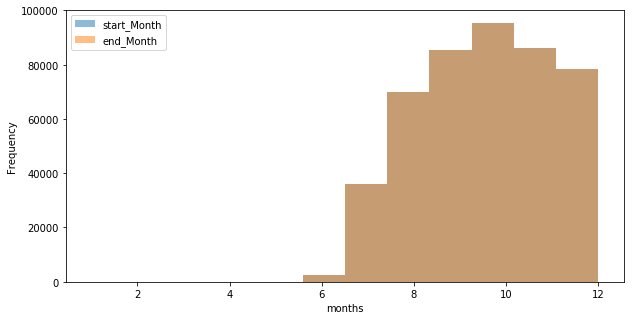

In [63]:
#plot the months when the trip started and when it ends
ax=bike[['start_Month', 'end_Month']].plot.hist(bins=12, alpha=0.5,figsize=(10,5))
plt.xlabel('months');

the two histogram are identical because the trips actully very short.

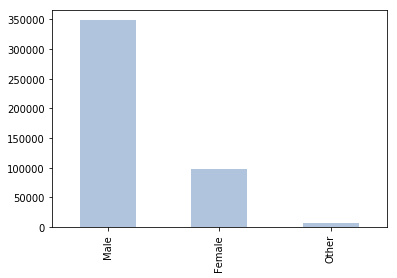

In [30]:
#plot the gender of the members .
bike.member_gender.value_counts().plot(kind='bar',color='lightsteelblue',title='gender of the members');

males are way more than the females

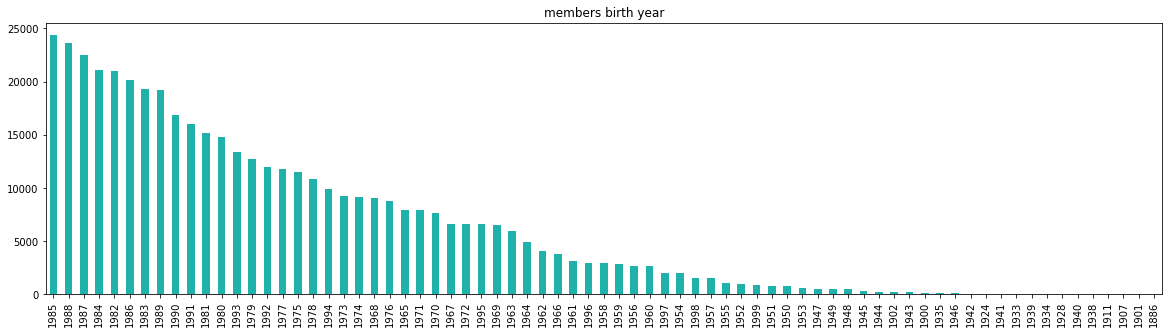

In [64]:
#plot the members birth year
bike.member_birth_year.value_counts().plot(kind='bar',figsize=(20,5),color='lightseagreen',title='members birth year');

most of the members are born in 1985

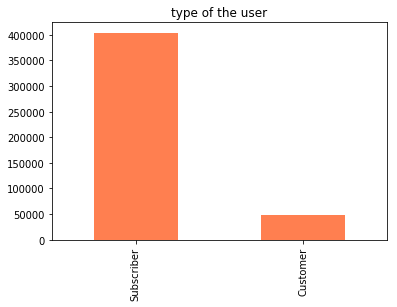

In [32]:
#plot the type of the user 'Customer' or 'Subscriber'.
bike.user_type.value_counts().plot(kind='bar',color='coral',title='type of the user');

most of the members are Subscriber

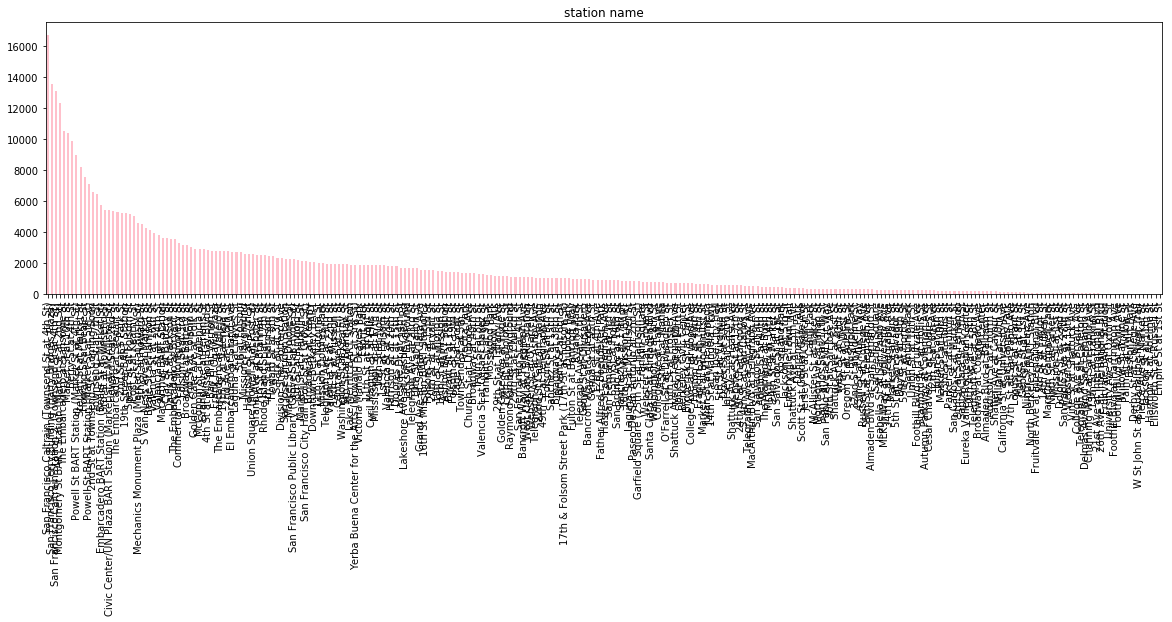

In [66]:
#plot the station name where the trip started
bike.end_station_name.value_counts().plot(kind='bar',figsize=(20,5),color='pink',title="station name");

actully it is not clear which station is the most frequent, I'll try to plot only the first 10.

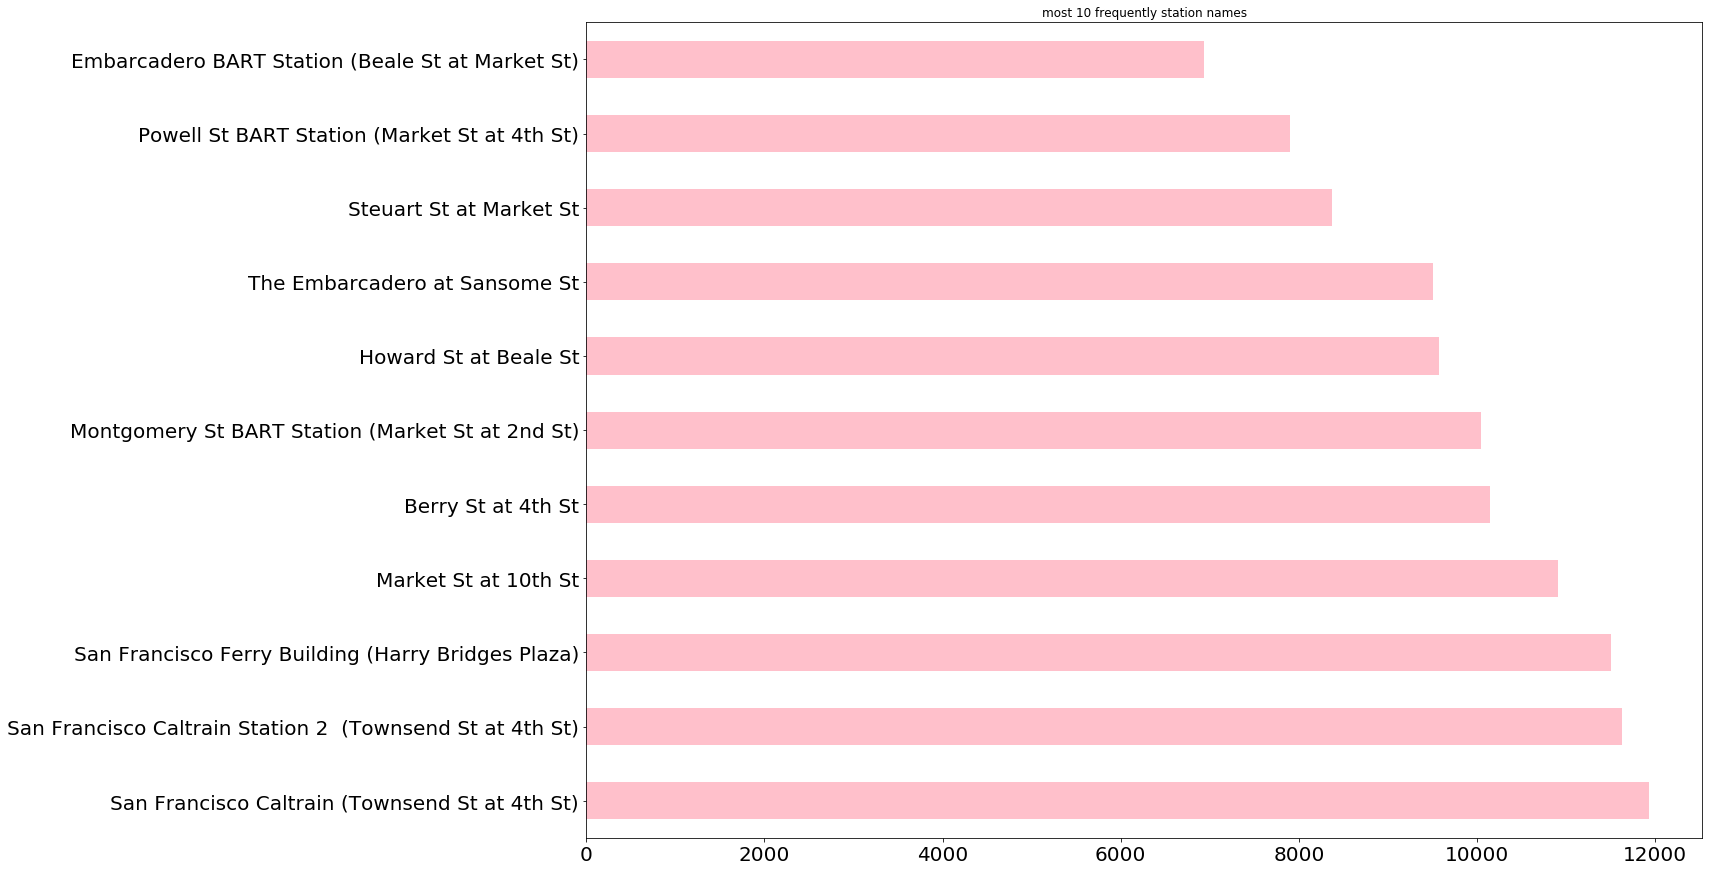

In [67]:
#plot only the most 10 frequently station names
bike.start_station_name.value_counts()[:11].plot(kind='barh',figsize=(20,15),color='pink',fontsize=20,title="most 10 frequently station names");

most of the members start driving the bike from "san francisco caltrain" station.

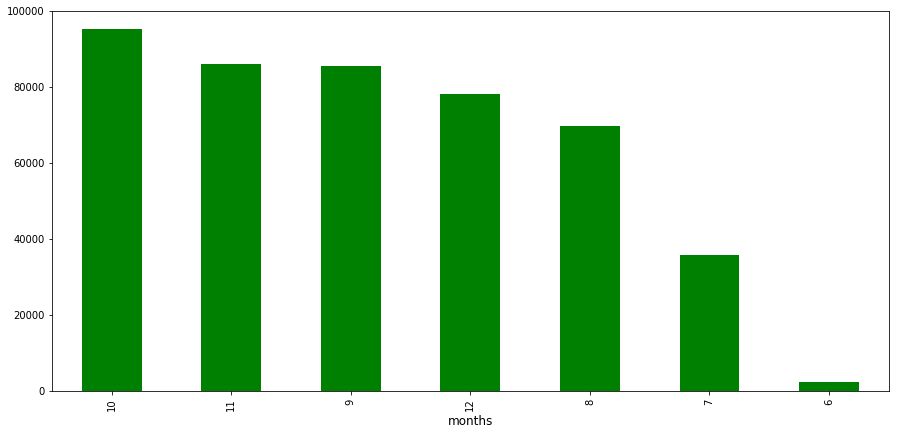

In [35]:
#plot the months when the trip started
a=bike.start_Month.value_counts().plot(kind='bar',figsize=(15,7),color='green')
a.set_xlabel("months",fontsize=12);

October is the most frequent month to the members starting drive the bike.

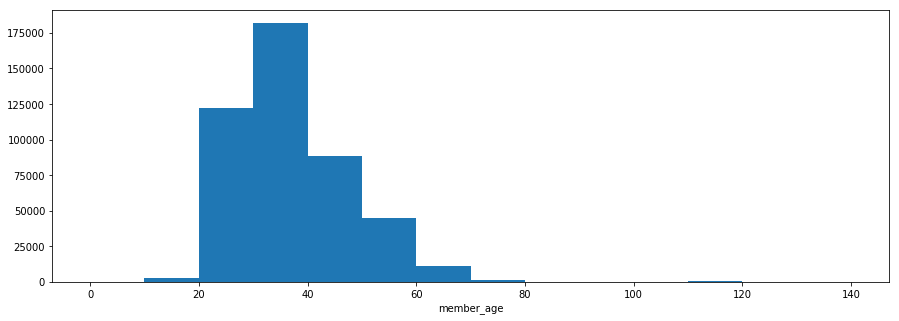

In [68]:
#plot histogram of the age of the members to see the distribution.
binsize = 10
bins = np.arange(0, bike['member_age'].max()+binsize, binsize)
plt.figure(figsize=[15, 5])
plt.hist(data = bike, x = 'member_age', bins = bins)
plt.xlabel('member_age')
plt.show();

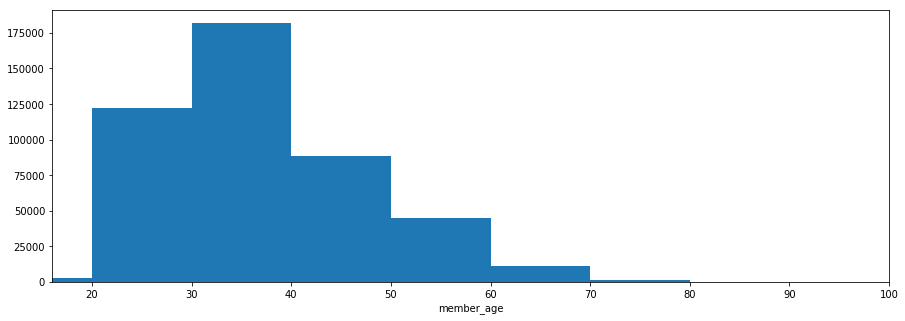

In [69]:
#plot histogram of the age of the members to see the distribution, with different X limits.
binsize = 10
bins = np.arange(0, bike['member_age'].max()+binsize, binsize)
plt.figure(figsize=[15, 5])
plt.hist(data = bike, x = 'member_age', bins = bins)
plt.xlabel('member_age')
plt.xlim([16,100])#added xlim to clear the visual
plt.show();

the plot is a kind of skewed to the right,the peak around age 30-40 where the most of the members age.

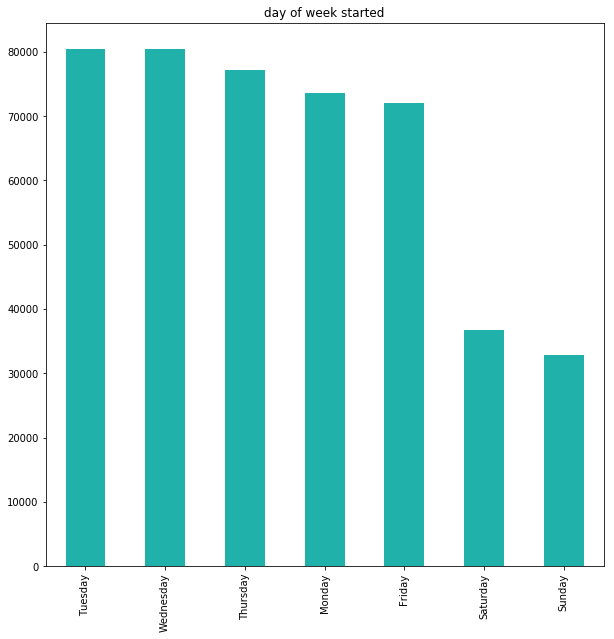

In [83]:
#plot which the day of week the members most start biking.
bike.day_of_week_start.value_counts().plot(kind='bar',figsize=(10,10),color='lightseagreen',title='day of week started');

Tuesday and Wednesday when members most start biking.

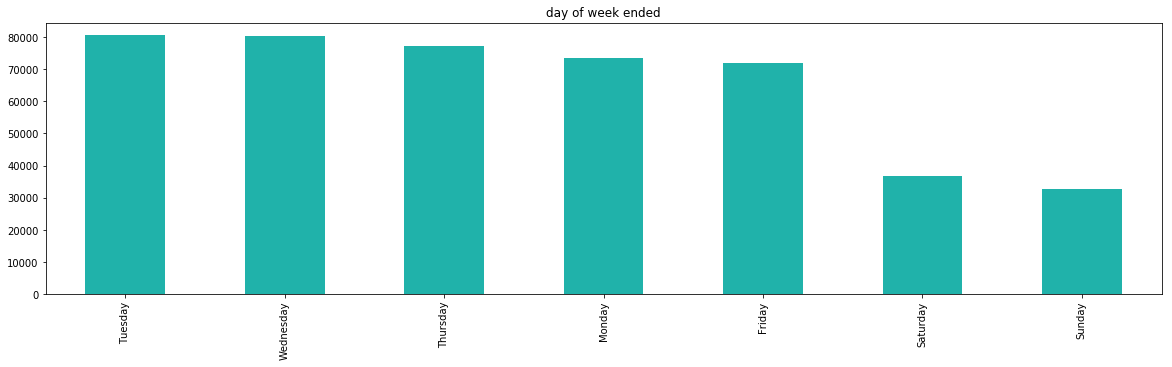

In [39]:
bike.day_of_week_end.value_counts().plot(kind='bar',figsize=(20,5),color='lightseagreen',title='day of week ended');

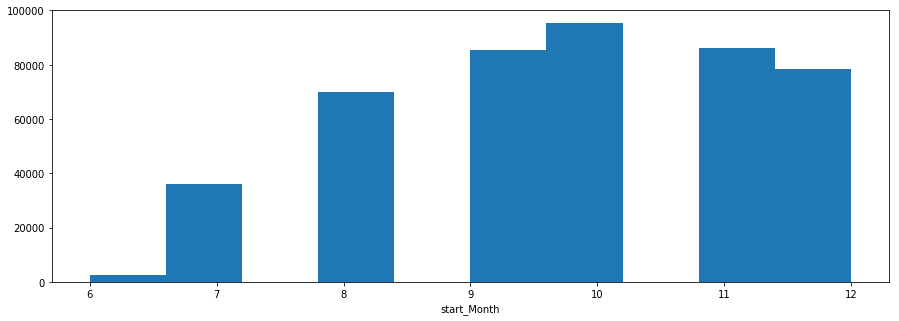

In [84]:
#plot histogram of start month
plt.figure(figsize=[15, 5])
plt.hist(data = bike, x = 'start_Month')
plt.xlabel('start_Month')
plt.show();

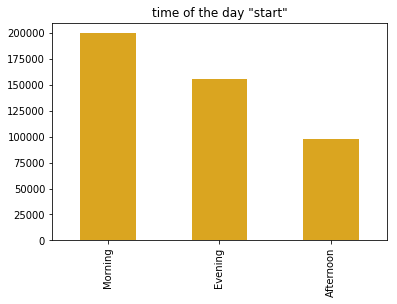

In [85]:
#plot time of the day when members most start biking 'Morning','Evening','Afternoon'.
bike.timeOfDay_start.value_counts().plot(kind='bar',color='goldenrod',title='time of the day "start"');

most of them in the morning

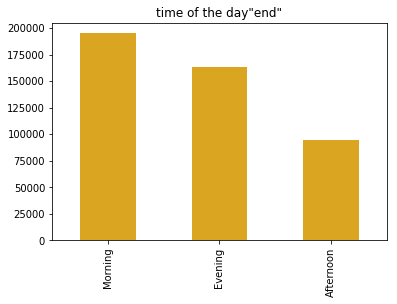

In [42]:
#plot time of the day when members most start biking 'Morning','Evening','Afternoon'.
bike.timeOfDay_end.value_counts().plot(kind='bar',color='goldenrod',title='time of the day"end"');

I can see that the morning deccrease and the evening increase, maybe because the members who started biking in the morning ended at evening.

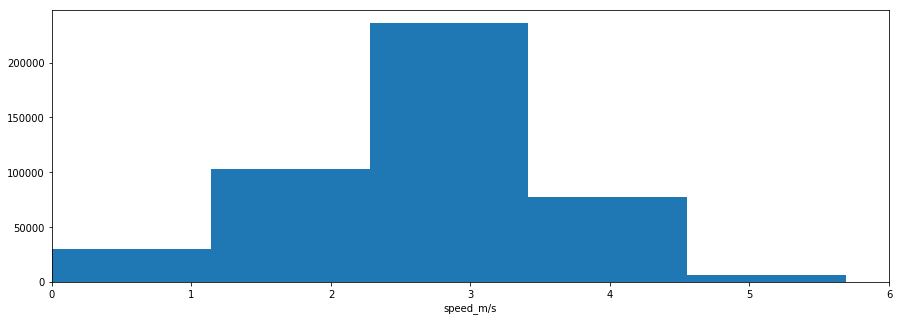

In [43]:
#plot histogram of speed to see the disribution.
plt.figure(figsize=[15, 5])
plt.hist(data = bike, x = 'speed_m/s')
plt.xlabel('speed_m/s')
plt.xlim([0,6])
plt.show();

# Bivariate Exploration

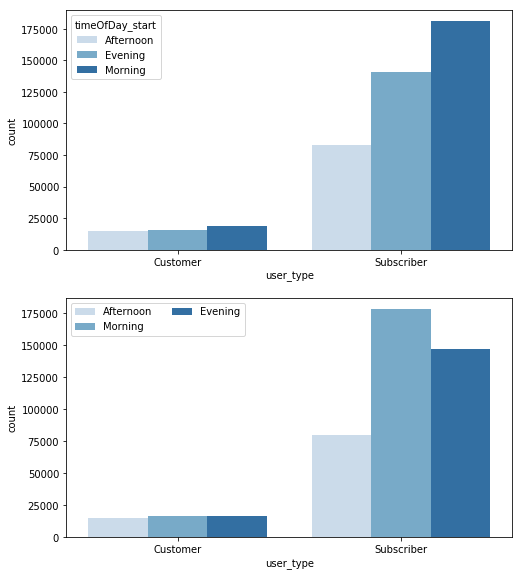

In [44]:
#plot the user_type and the time Of Day when the trip starts and when the trip ends
plt.figure(figsize = [8, 15])
plt.subplot(3, 1, 1)
sb.countplot(data = bike,x='user_type',hue='timeOfDay_start', palette = 'Blues')
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bike,x='user_type',hue ='timeOfDay_end',palette = 'Blues')
ax.legend(ncol = 2)
plt.show()

if we look the the start plot:we can see both Subscriber or Customer most time to start driving the bike at the morning,and the least time to start driving the bike at afternoon,maybe because of the heat.

if we look the the end plot:we can see both Subscriber or Customer most time to start driving the bike also at the morning

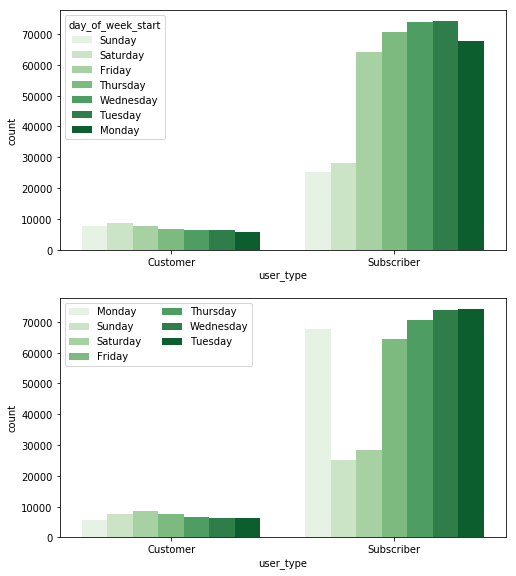

In [45]:
#plot the user_type and the day of week when the trip starts and when the trip ends
plt.figure(figsize = [8, 15])
plt.subplot(3, 1, 1)
sb.countplot(data = bike, x = 'user_type', hue = 'day_of_week_start', palette = 'Greens')
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bike, x = 'user_type',hue = 'day_of_week_end', palette = 'Greens')
ax.legend(ncol = 2)
plt.show()

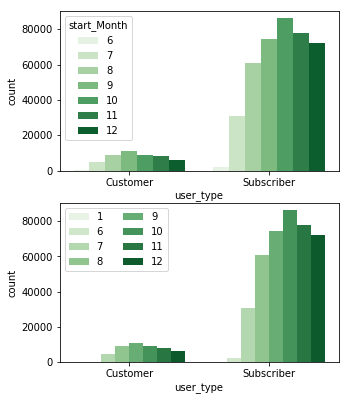

In [32]:
#plot the user_type and the day of week when the trip starts and when the trip ends
plt.figure(figsize = [5, 10])
plt.subplot(3, 1, 1)
sb.countplot(data = bike, x = 'user_type', hue = 'start_Month', palette = 'Greens')
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bike, x = 'user_type',hue = 'end_Month', palette = 'Greens')
ax.legend(ncol = 2)
plt.show()

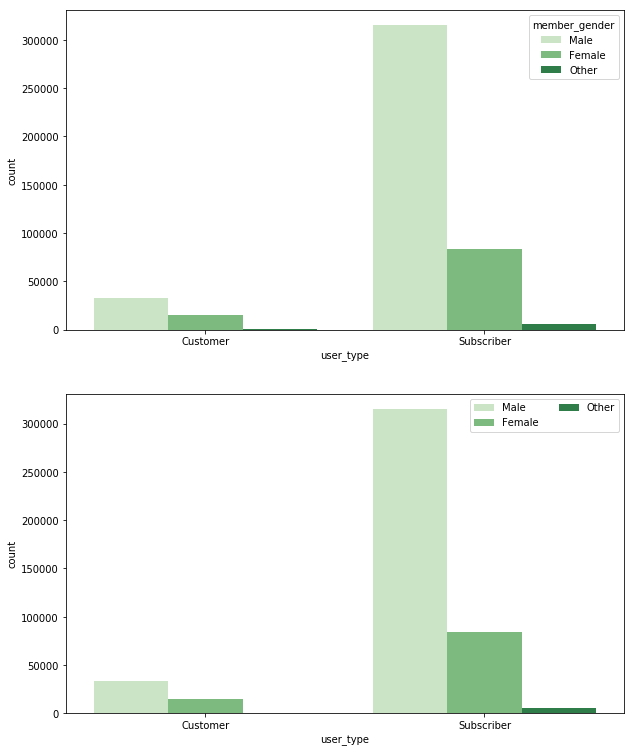

In [75]:
#plot the user_type and the day of week when the trip starts and when the trip ends
plt.figure(figsize = [10, 20])
plt.subplot(3, 1, 1)
sb.countplot(data = bike, x = 'user_type', hue = 'member_gender', palette = 'Greens')
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bike, x = 'user_type',hue = 'member_gender', palette = 'Greens')
ax.legend(ncol = 2)
plt.show()

in the both plot we can see both Subscriber or Customer least time to start and end driving the bike at the weekend.

In [46]:
#declare variables 'numerical' and 'categorical'
numeric_vars = ['duration_min', 'Distance_M','speed_m/s','member_age']
categoric_vars = ['member_gender', 'user_type', 'timeOfDay_start','day_of_week_start']

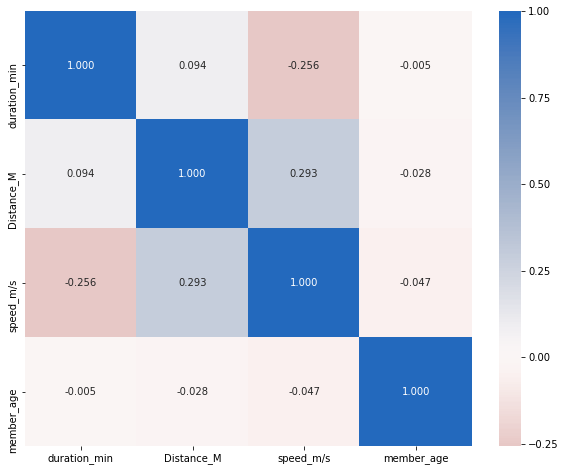

In [47]:
#plot numric variables.'heatedmap'
plt.figure(figsize = [10, 8])
sb.heatmap(bike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

The highest correlation value is '0.293' and it is between 'Distance_M' and 'speed_m/s'

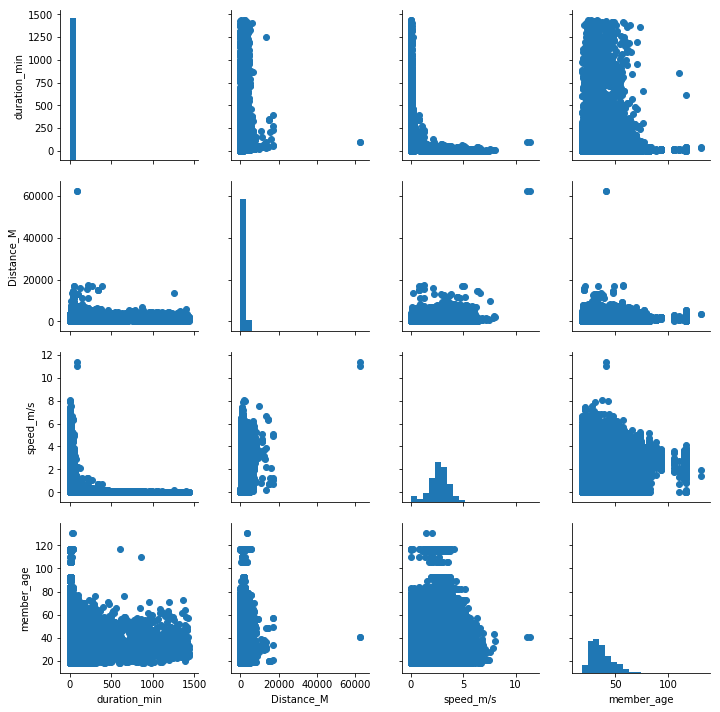

In [89]:
#plot numric variables.'scatter and hist'
p = sb.PairGrid(data = bike, vars = numeric_vars)
p = p.map_diag(plt.hist, bins = 20);
p.map_offdiag(plt.scatter);

there is no observed correlation 

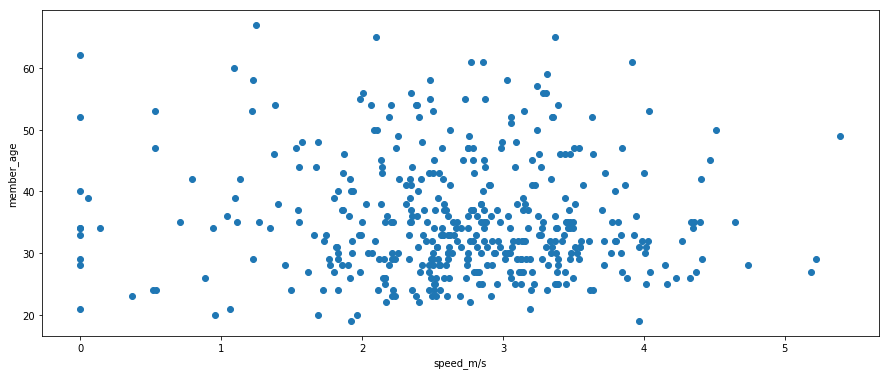

In [66]:
#plot the age of the members and the speed of the bike trips
samples = np.random.choice(bike.shape[0], 500, replace = False)
bike_samp = bike.loc[samples,:]
plt.figure(figsize = [15, 6])
plt.scatter(data = bike_samp, y = 'member_age', x = 'speed_m/s')
plt.ylabel('member_age')
plt.xlabel('speed_m/s')
plt.show()

also here there is no observed correlation, but most of the members has speed limit from 0 to 6

In [65]:
#plot the age of the members and the duration of the bike trips
samples = np.random.choice(bike.shape[0], 500, replace = False)
bike_samp = bike.loc[samples,:].plt.figure(figsize = [15, 6])
plt.scatter(data = bike_samp, x = 'member_age', y = 'duration_min')
plt.xlabel('member_age')
plt.ylabel('duration_min')
plt.show();

AttributeError: 'DataFrame' object has no attribute 'plt'

there is no observed correlation,but you can see a lot of them has short duration minutes.

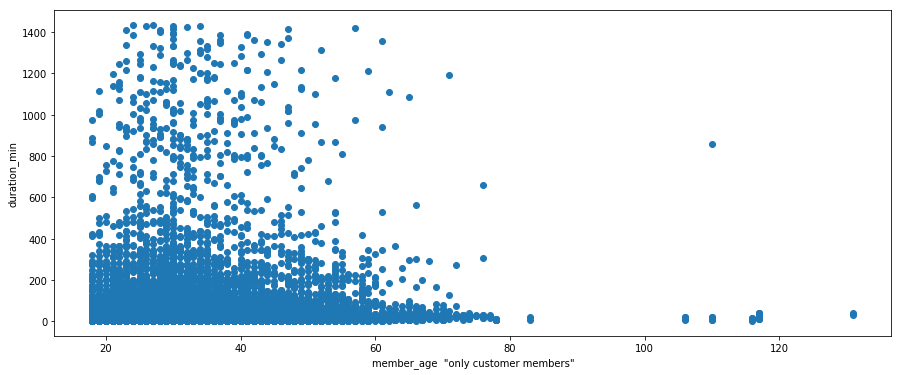

In [87]:
#plot the age of the members "only Customers" and the duration of the bike trips
plt.figure(figsize = [15, 6])
plt.scatter(data = bike[bike['user_type']=='Customer'], x = 'member_age', y = 'duration_min')
plt.xlabel('member_age  "only customer members"')
plt.ylabel('duration_min')
plt.show()

now you can clearly see that there is no observed correlation,but you can see a lot of them has short duration minutes

# Multivariate Exploration

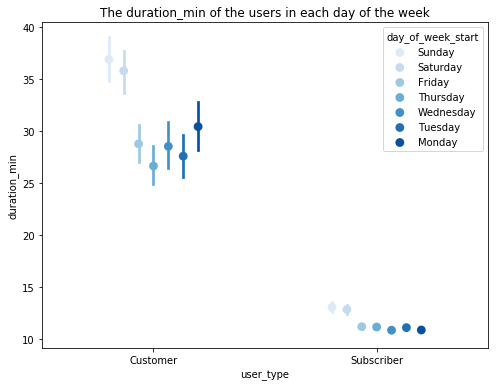

In [75]:
# plot the duration of the trip in minutes by the user_type and day_of_week when the trip started
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, x = 'user_type', y = 'duration_min', hue = 'day_of_week_start',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('The duration_min of the users in each day of the week')
plt.ylabel('duration_min')
ax.set_yticklabels([],minor = True)
plt.show();
#['member_gender', 'user_type', 'timeOfDay_start','day_of_week_start']

 both Subscriber and Customer most duration time is at the weekend.

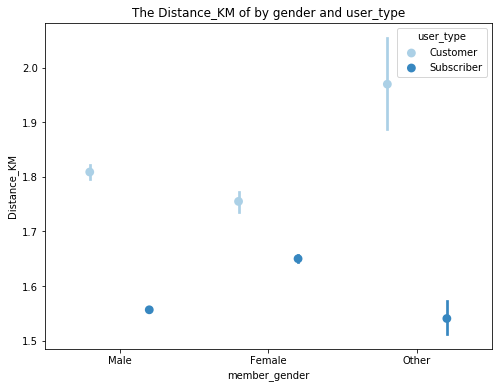

In [78]:
# plot the Distance traviled of the trip in KM by the user_type and day_of_week when the trip started
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, x = 'member_gender', y = 'Distance_KM', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('The Distance_KM of by gender and user_type')
plt.ylabel('Distance_KM')
ax.set_yticklabels([],minor = True)
plt.show();

 both Subscriber and Customer least distance traviled is at the weekend, maybe because the traffic.

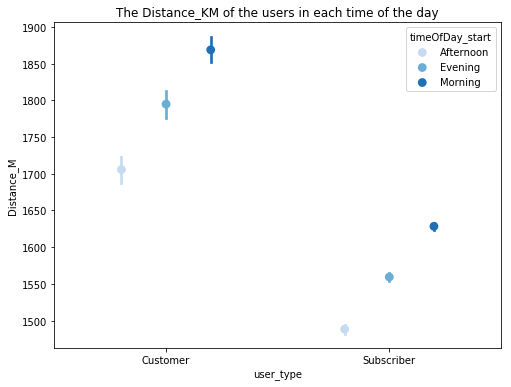

In [54]:
# plot the Distance traviled of the trip in M by the user_type and timeOfDay when the trip started
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, x = 'user_type', y = 'Distance_M', hue = 'timeOfDay_start',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('The Distance_M of the users in each time of the day')
plt.ylabel('Distance_M')
ax.set_yticklabels([],minor = True)
plt.show();

in both Subscriber and Customer least distance traviled by the bike at afternoon,maybe because of the heat.

and the most distance traviled is at the morning, maybe becase it is the time of people going to work.

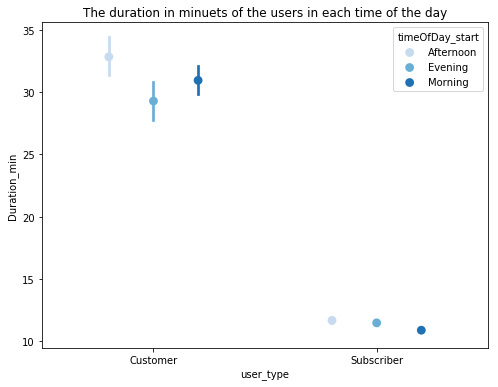

In [91]:
# plot the duration of the trip in minutes by the user_type and timeOfDay when the trip started
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, x = 'user_type', y = 'duration_min', hue = 'timeOfDay_start',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('The duration in minuets of the users in each time of the day')
plt.ylabel('Duration_min')
ax.set_yticklabels([],minor = True)
plt.show();

when we compare this plot and the previous one we  can see that the afternoon has the longest duration and shorest distance, maybe because in this time there is a lot of traffic.

also the morning has longest distance and shortest duration,maybe because at the morning there is no traffic.

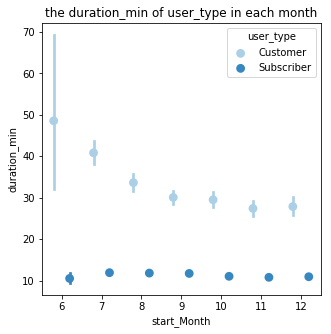

In [30]:
#plot the duration of the trip in minutes by the user_type and month when the trip started
fig = plt.figure(figsize = [5,5])
ax = sb.pointplot(data = bike, x = 'start_Month', y = 'duration_min', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('the duration_min of user_type in each month')
plt.ylabel('duration_min')
ax.set_yticklabels([],minor = True)
plt.show();

clearly the customer has longer duration minutes in each month.

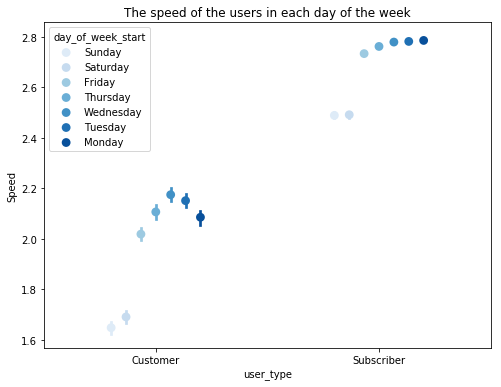

In [70]:
# plot the Distance traviled of the trip in KM by the user_type and day_of_week when the trip started
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, x = 'user_type', y = 'speed_m/s', hue = 'day_of_week_start',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('The speed of the users in each day of the week')
plt.ylabel('Speed')
ax.set_yticklabels([],minor = True)
plt.show();